In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from importlib import reload
import poppy

import misc

Nacts = 48
dm_diam = 46.3*u.mm
act_spacing = 0.9906*u.mm

dmdir = Path('/groups/douglase/kians-data-files/roman-cgi-phasec-data/dm-acts')
dm1_piston_fname = str(dmdir/'hlc_dm1.fits')
dm2_piston_fname = str(dmdir/'hlc_dm2.fits')

dm1 = poppy.ContinuousDeformableMirror(dm_shape=(Nacts,Nacts), name='DM1', actuator_spacing=act_spacing, radius=dm_diam/2,
                                       influence_func=str(dmdir/'proper_inf_func.fits'))
dm1_piston_map = fits.getdata(dm1_piston_fname)
dm1.set_surface(dm1_piston_map)

dm2 = poppy.ContinuousDeformableMirror(dm_shape=(Nacts,Nacts), name='DM2', actuator_spacing=act_spacing, radius=dm_diam/2,
                                       influence_func=str(dmdir/'proper_inf_func.fits'))
dm2_piston_map = fits.getdata(dm2_piston_fname)
dm2.set_surface(dm2_piston_map)

dm1s = [dm1, dm2]
dm2s = [dm2, dm1]

# misc.display_dm(dm1)
# misc.display_dm(dm2)


In [4]:
isinstance(dm2, poppy.ContinuousDeformableMirror)

True

In [4]:
import numpy as np
import astropy.units as u
from astropy.io import fits
from pathlib import Path
from importlib import reload
import poppy

import misc

from poppy_roman_cgi_phasec import run
reload(run)

wavelength_c = 575e-9*u.m
wavelengths = np.linspace(wavelength_c - wavelength_c*.10/2, wavelength_c + wavelength_c*.10/2, 3)

dm1s = [np.zeros((48,48)), np.zeros((48,48))]
dm2s = [np.zeros((48,48)), np.zeros((48,48))]
# dm1s = [dm1, dm2]
# dm2s = [dm2, dm1]

cgi_dir = Path('/groups/douglase/kians-data-files/roman-cgi-phasec-data')

psfs, wfs = run.run_multi(ncpus=16, mode='HLC575', quiet=False,
#                           wavelength=wavelengths,
#                           dm1 = 'hlc_dm1.fits', dm2='hlc_dm2.fits',
                          dm1=dm1s, dm2=dm2s,
#                           dm1=np.zeros((2,48,48)), dm2=np.zeros((2,48,48)), 
                          cgi_dir=cgi_dir,
#                           return_intermediates=True, 
                         )



Running mode HLC575 for multiple DM settings.
run_hlc
Propagating wavelength 575.000 nm.
PSF calculated in 6.90s
run_hlc
Propagating wavelength 575.000 nm.
PSF calculated in 6.92s


In [6]:
wfs

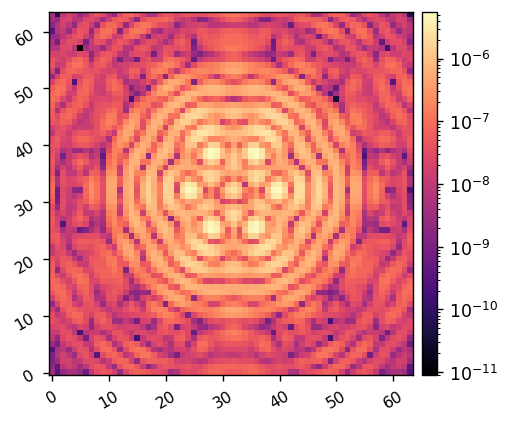

In [5]:
misc.myimshow(wfs[0].intensity, lognorm=True)